In [1]:
import numpy as np         #numpy is used for most of the mathematical (as np ables us to use it as a shortcut)
import matplotlib.pyplot as plt     # for charts and graphs
import pandas as pd

dataset = pd.read_csv('/kaggle/input/predict-online-gaming-behavior-dataset/online_gaming_behavior_dataset.csv')   

dataset.head()

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium
1,9001,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium
2,9002,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High
3,9003,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium
4,9004,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium


In [2]:
def get_df_info(df):
    print("\n\033[1mShape of DataFrame:\033[0m ", df.shape)
    print("\n\033[1mColumns in DataFrame:\033[0m ", df.columns.to_list())
    print("\n\033[1mData types of columns:\033[0m\n", df.dtypes)
    
    print("\n\033[1mInformation about DataFrame:\033[0m")
    df.info()
    
    print("\n\033[1mNumber of unique values in each column:\033[0m")
    for col in df.columns:
        print(f"\033[1m{col}\033[0m: {df[col].nunique()}")
        
    print("\n\033[1mNumber of null values in each column:\033[0m\n", df.isnull().sum())
    
    print("\n\033[1mNumber of duplicate rows:\033[0m ", df.duplicated().sum())
    
    print("\n\033[1mDescriptive statistics of DataFrame:\033[0m\n", df.describe().transpose())

# Call the function
get_df_info(dataset)


Shape of DataFrame:  (40034, 13)

Columns in DataFrame:  ['PlayerID', 'Age', 'Gender', 'Location', 'GameGenre', 'PlayTimeHours', 'InGamePurchases', 'GameDifficulty', 'SessionsPerWeek', 'AvgSessionDurationMinutes', 'PlayerLevel', 'AchievementsUnlocked', 'EngagementLevel']

Data types of columns:
 PlayerID                       int64
Age                            int64
Gender                        object
Location                      object
GameGenre                     object
PlayTimeHours                float64
InGamePurchases                int64
GameDifficulty                object
SessionsPerWeek                int64
AvgSessionDurationMinutes      int64
PlayerLevel                    int64
AchievementsUnlocked           int64
EngagementLevel               object
dtype: object

Information about DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40034 entries, 0 to 40033
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------ 

array([[<Axes: title={'center': 'PlayerID'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'PlayTimeHours'}>],
       [<Axes: title={'center': 'InGamePurchases'}>,
        <Axes: title={'center': 'SessionsPerWeek'}>,
        <Axes: title={'center': 'AvgSessionDurationMinutes'}>],
       [<Axes: title={'center': 'PlayerLevel'}>,
        <Axes: title={'center': 'AchievementsUnlocked'}>, <Axes: >]],
      dtype=object)

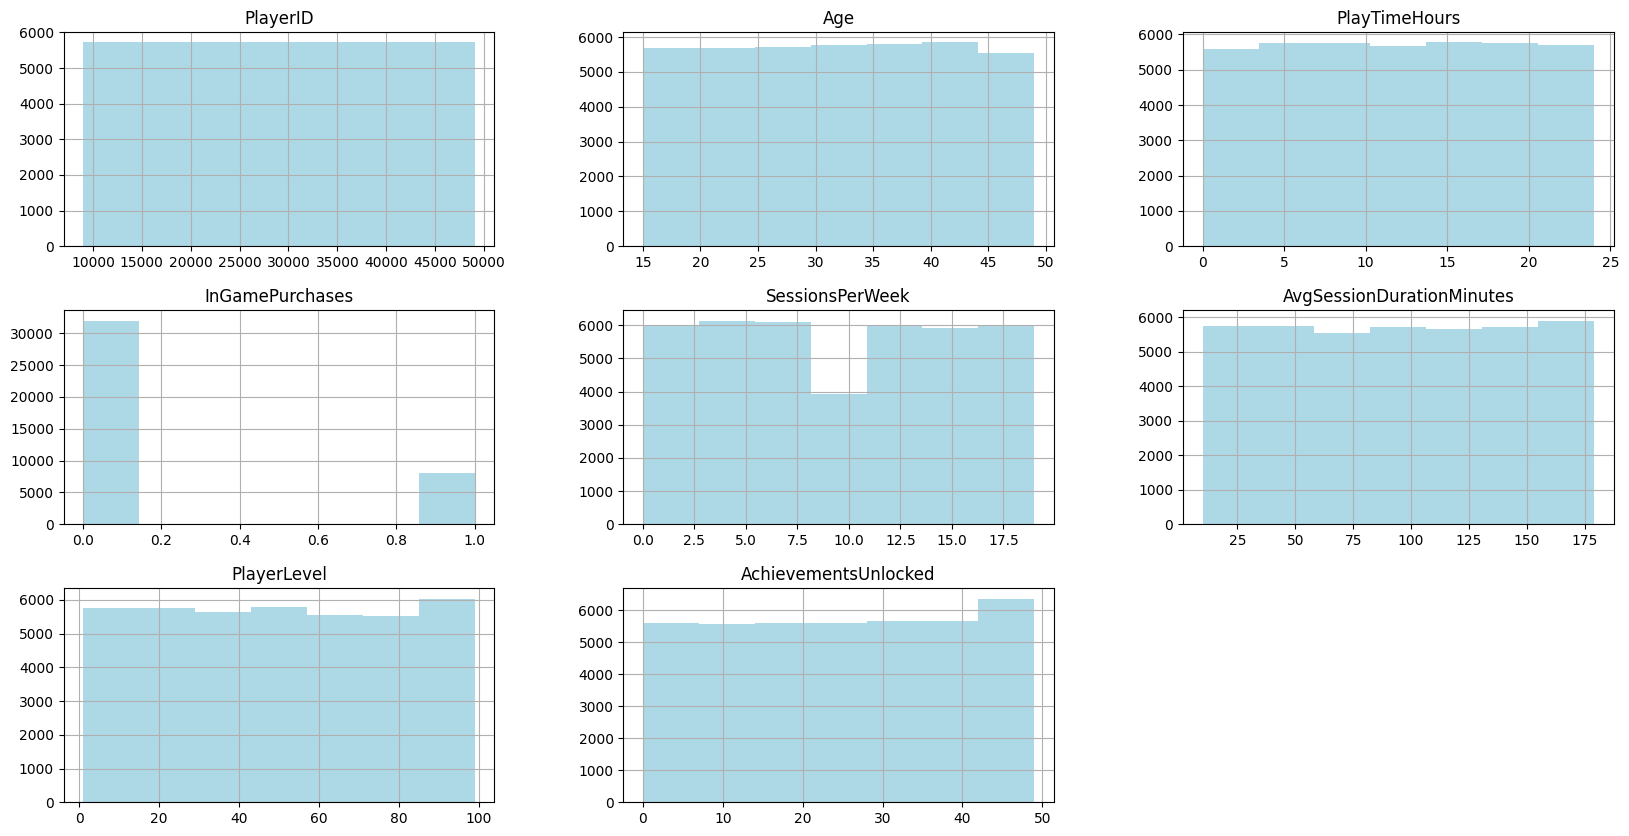

In [3]:
dataset.hist(figsize=(20,10),bins=7, color='lightblue')

In [4]:
X=dataset.iloc[:,1:12].values
y=dataset.iloc[:,12].values


In [5]:
print(X[:3,:])
print(y)

[[43 'Male' 'Other' 'Strategy' 16.271118760553215 0 'Medium' 6 108 79 25]
 [29 'Female' 'USA' 'Strategy' 5.525961380570566 0 'Medium' 5 144 11 10]
 [22 'Female' 'USA' 'Sports' 8.223755243499511 0 'Easy' 16 142 35 41]]
['Medium' 'Medium' 'High' ... 'High' 'Medium' 'Medium']


In [6]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
label=LabelEncoder()
X[:,1]=label.fit_transform(X[:,1])


In [7]:
print(X[:3,:])

[[43 1 'Other' 'Strategy' 16.271118760553215 0 'Medium' 6 108 79 25]
 [29 0 'USA' 'Strategy' 5.525961380570566 0 'Medium' 5 144 11 10]
 [22 0 'USA' 'Sports' 8.223755243499511 0 'Easy' 16 142 35 41]]


In [8]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
column = X[:,2].reshape(-1, 1)
onehotencoder =OneHotEncoder()    
# inside brackets specifies that first column needs to be labeled
efc= onehotencoder.fit_transform(column).toarray()
X = np.hstack((X[:, 0:2], efc[:,1:],X[:, 3:])) #dummy variable removed



In [9]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
column = y.reshape(-1,1)
onehotencoder =OneHotEncoder()    
# inside brackets specifies that first column needs to be labeled
efc= onehotencoder.fit_transform(column).toarray()
y= efc
print(y)

[[0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 ...
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]]


In [10]:
print(X[:3,:])

[[43 1 0.0 1.0 0.0 'Strategy' 16.271118760553215 0 'Medium' 6 108 79 25]
 [29 0 0.0 0.0 1.0 'Strategy' 5.525961380570566 0 'Medium' 5 144 11 10]
 [22 0 0.0 0.0 1.0 'Sports' 8.223755243499511 0 'Easy' 16 142 35 41]]


In [11]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
column = X[:,5].reshape(-1, 1)
onehotencoder =OneHotEncoder()    
# inside brackets specifies that first column needs to be labeled
efc= onehotencoder.fit_transform(column).toarray()
X = np.hstack((X[:, 0:5], efc[:,1:],X[:, 6:])) #dummy variable removed


In [12]:
print(X[:3,:])

[[43 1 0.0 1.0 0.0 0.0 0.0 0.0 1.0 16.271118760553215 0 'Medium' 6 108 79
  25]
 [29 0 0.0 0.0 1.0 0.0 0.0 0.0 1.0 5.525961380570566 0 'Medium' 5 144 11
  10]
 [22 0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 8.223755243499511 0 'Easy' 16 142 35
  41]]


In [13]:
difficulty_mapping = {'Easy': 0, 'Medium': 1, 'Hard': 2}

# Apply the mapping
X[:,11]= [difficulty_mapping[item] for item in X[:,11]]

In [14]:
print(X[:3,:])

[[43 1 0.0 1.0 0.0 0.0 0.0 0.0 1.0 16.271118760553215 0 1 6 108 79 25]
 [29 0 0.0 0.0 1.0 0.0 0.0 0.0 1.0 5.525961380570566 0 1 5 144 11 10]
 [22 0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 8.223755243499511 0 0 16 142 35 41]]


In [15]:
X=X.astype(float)

In [16]:
print(X[:3,:])

[[ 43.           1.           0.           1.           0.
    0.           0.           0.           1.          16.27111876
    0.           1.           6.         108.          79.
   25.        ]
 [ 29.           0.           0.           0.           1.
    0.           0.           0.           1.           5.52596138
    0.           1.           5.         144.          11.
   10.        ]
 [ 22.           0.           0.           0.           1.
    0.           0.           1.           0.           8.22375524
    0.           0.          16.         142.          35.
   41.        ]]


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train , y_test = train_test_split(X, y , test_size= 0.2, random_state=0)


from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)


In [20]:

# buildinf the ANN
import keras
from keras.models import Sequential

from keras.layers import Dense, Dropout, BatchNormalization


#intitialize ANN
classifier = Sequential()

# maiking the first hidden layer
classifier.add(Dense(units= 32, kernel_initializer = 'uniform', activation= 'relu', input_dim=16))


# adding second layer
classifier.add(Dense(units= 64, kernel_initializer = 'uniform', activation= 'relu'))



# adding second layer
classifier.add(Dense(units= 64, kernel_initializer = 'uniform', activation= 'relu'))



#adding the output layer
classifier.add(Dense(units= 3, kernel_initializer = 'uniform', activation= 'softmax'))

#compiling sll the layers
classifier.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])


#fitting into train set
classifier.fit(X_train,y_train,batch_size=10, epochs= 150,validation_split=0.15)

Epoch 1/150
2723/2723 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7714 - loss: 0.6052 - val_accuracy: 0.8807 - val_loss: 0.4059
Epoch 2/150
2723/2723 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8870 - loss: 0.3841 - val_accuracy: 0.8826 - val_loss: 0.3901
Epoch 3/150
2723/2723 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8989 - loss: 0.3648 - val_accuracy: 0.9001 - val_loss: 0.3602
Epoch 4/150
2723/2723 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9036 - loss: 0.3478 - val_accuracy: 0.8887 - val_loss: 0.3814
Epoch 5/150
2723/2723 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9052 - loss: 0.3427 - val_accuracy: 0.9039 - val_loss: 0.3513
Epoch 6/150
2723/2723 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9035 - loss: 0.3494 - val_accuracy: 0.9020 - val_loss: 0.3514
Epoch 7/150
2723/2723 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9055 - loss: 0.3413 - val_accuracy: 0.9036 - val_loss: 0.3547
Epoch 8/150
2723/2723 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9118 - loss: 0